In [48]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from src.data.handlers import CSVLoader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
csv_loader = CSVLoader('../model_diff.csv')
model_diff = csv_loader.load()
model_diff.head(3)

,Unnamed: 0,y_pred,y
0,0,205841.651984,208500
1,1,183850.938887,181500
2,2,214597.297125,223500


In [50]:
diff = model_diff['y'] - model_diff['y_pred']
gt_higher = diff > 0
pred_higher = diff < 0

model_diff['diff'] = diff

model_diff['gt_higher'] = gt_higher
model_diff['pred_higher'] = pred_higher

def calc_diff_pp(row):
    if row['diff'] > 0:
        return (1-round(row['y_pred'] / row['y'], 2))*100
    else:
        return (1-round(row['y'] / row['y_pred'], 2))*100

model_diff['diff_pp'] = model_diff[['diff', 'y', 'y_pred']].apply(calc_diff_pp, axis=1)

model_diff.head(100)

,Unnamed: 0,y_pred,y,diff,gt_higher,pred_higher,diff_pp
0,0,205841.651984,208500,2658.348016,True,False,1.0
1,1,183850.938887,181500,-2350.938887,False,True,1.0
2,2,214597.297125,223500,8902.702875,True,False,4.0
3,3,150671.647540,140000,-10671.647540,False,True,7.0
4,4,271290.240176,250000,-21290.240176,False,True,8.0
...,...,...,...,...,...,...,...
95,95,183643.941793,185000,1356.058207,True,False,1.0
96,96,227758.468586,214000,-13758.468586,False,True,6.0
97,97,114422.019603,94750,-19672.019603,False,True,17.0
98,98,82698.254491,83000,301.745509,True,False,0.0


In [51]:
print(f'Grand truth value is higher in {gt_higher.sum()} cases, and predicted value in {pred_higher.sum()}')

Grand truth value is higher in 723 cases, and predicted value in 737


In [52]:
print(f'Mean diff for Grand Truth={model_diff[gt_higher]["diff"].mean()} and for predicted values={model_diff[pred_higher]["diff"].abs().mean()}')

Mean diff for Grand Truth=6427.050663727358 and for predicted values=6346.656405815158


In [53]:
print(f'Mean percentage diff for Grand Truth={model_diff[gt_higher]["diff_pp"].mean()} and for predicted values={model_diff[pred_higher]["diff_pp"].mean()}')

Mean percentage diff for Grand Truth=3.4038727524204715 and for predicted values=4.0705563093622805


<AxesSubplot:>

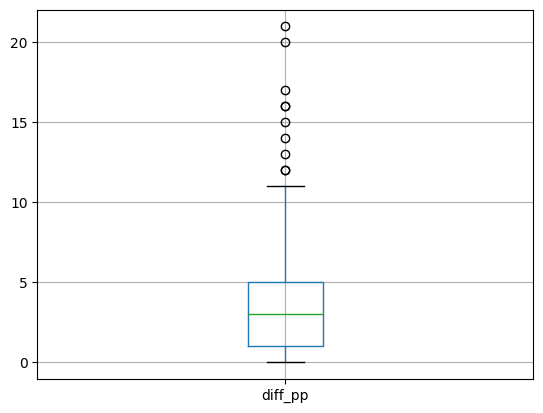

In [54]:
model_diff[gt_higher].boxplot(column=['diff_pp'])

<AxesSubplot:>

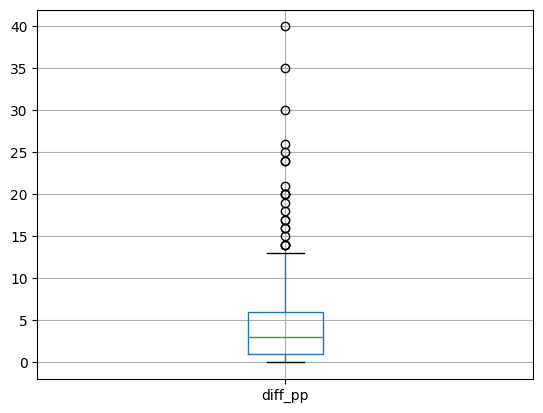

In [55]:
model_diff[pred_higher].boxplot(column=['diff_pp'])